In [190]:
import numpy as np

In [191]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)

In [192]:
import sklearn

In [193]:
ts_greater_than_50 = [0.8368793055159074, 0.8781529222185697, 0.9261115653178325, \
                      0.9444316309175987, 0.943463049926444, 0.949267357821394, \
                      0.9593287899058109, 0.9684638768413594, 0.9801925971721592, \
                      0.9867766527703753, 0.9896272236103923, 0.9930944260489442, \
                      0.9921827685980716, 0.9873749258839792, 0.9479665420658484]
ts_less_than_50 = [0.1875869664650108, 0.15485906980812408, 0.12197057340251645, \
                   0.106385944442888, 0.10371977090990937, 0.1002225519406697, \
                   0.08803256012584065, 0.07352519096427883, 0.06397183194542282, \
                   0.060336088078640146, 0.05711939371722593, 0.048424310527362714, \
                   0.046118230002406335, 0.04851056319545665, 0.05203345793417092]

In [194]:
x_labels = ['19Q1','19Q2','19Q3','19Q4','20Q1','20Q2','20Q3','20Q4','21Q1','21Q2','21Q3','21Q4','22Q1','22Q2','22Q3']

labels_2030 = []
for year in range(2019,2031):
    for quarter in range(1,5):
        labels_2030.append(str(year)[-2:] + ' Q' + str(quarter))

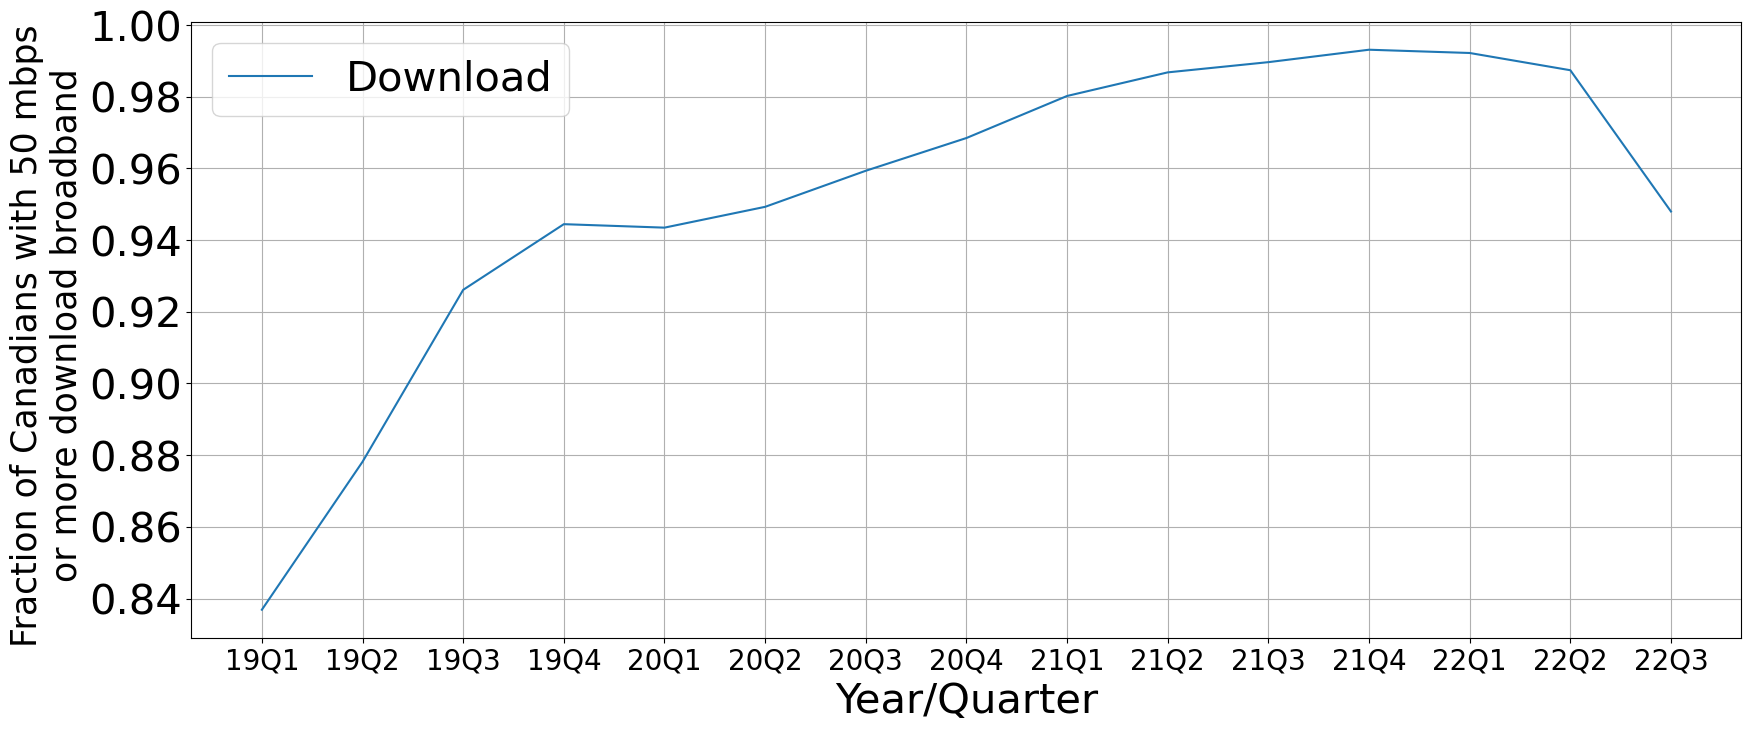

In [195]:
fontsize = 30
plt.plot(x_labels, ts_greater_than_50, label = 'Download')
#plt.plot(x_labels, ts_less_than_50, label = 'Upload')
plt.xlabel('Year/Quarter', fontsize = fontsize)
plt.ylabel('Fraction of Canadians with 50 mbps \n or more download broadband', fontsize = fontsize-5)
plt.xticks(fontsize = fontsize-10)
plt.yticks(fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.grid();

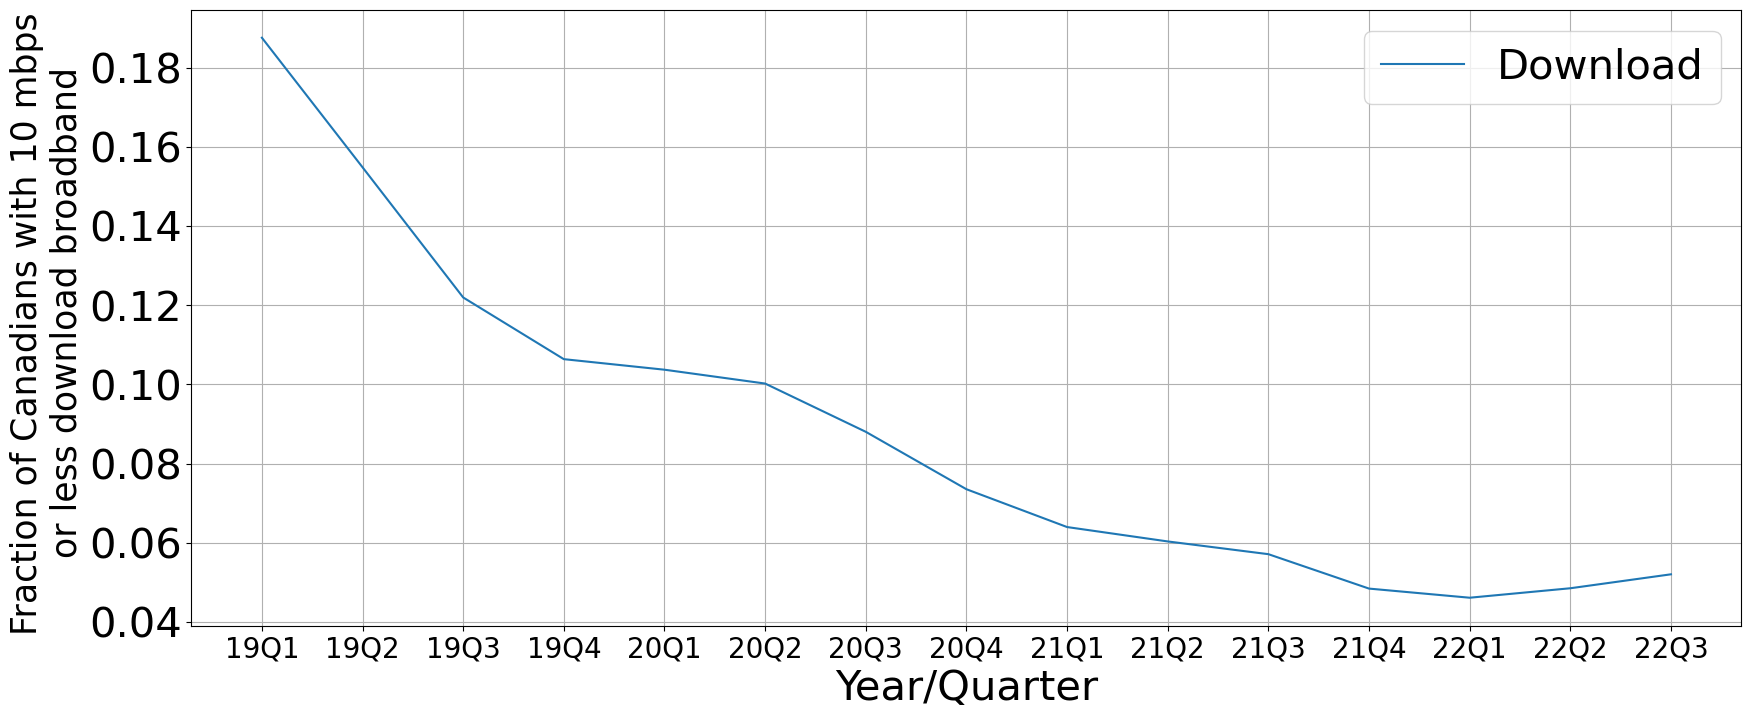

In [196]:
fontsize = 30
plt.plot(x_labels, ts_less_than_50, label = 'Download')
plt.xlabel('Year/Quarter', fontsize = fontsize)
plt.ylabel('Fraction of Canadians with 10 mbps \n or less download broadband', fontsize = fontsize-5)
plt.xticks(fontsize = fontsize-10)
plt.yticks(fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.grid();

In [197]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [198]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [199]:
regressor_types = [LinearRegression,
                   LGBMRegressor, 
                   XGBRegressor, 
                   CatBoostRegressor, 
                   SGDRegressor, 
                   KernelRidge, 
                   ElasticNet, 
                   BayesianRidge, 
                   GradientBoostingRegressor, 
                   SVR]
regressor_names = ['LinearRegression',
                   'LGBMRegressor', 
                   'XGBRegressor', 
                   'CatBoostRegressor', 
                   'SGDRegressor', 
                   'KernelRidge', 
                   'ElasticNet', 
                   'BayesianRidge', 
                   'GradientBoostingRegressor', 
                   'SVR']

In [200]:
# n_samples, n_features = 10, 5
# y = np.random.randn(n_samples)
# X = np.random.randn(n_samples, n_features)
# regr = make_pipeline(StandardScaler(), SVR())
# regr.fit(X, y)

In [201]:
#Train test split
n_input = 3
n_output = 1

X = []
y = []
for ii, item in enumerate(ts_greater_than_50):
    if ii < (len(ts_greater_than_50) - n_input):
        try:
            X.append(ts_greater_than_50[ii:ii + n_input]) 
            y.append(ts_greater_than_50[ii + n_input:ii + n_input + n_output])
        finally:
            pass

In [202]:
# for ii, regressor in enumerate(regressor_types):
#     print(regressor_names[ii])
#     regr = make_pipeline(StandardScaler(), regressor())
#     regr.fit(X, y)
    
#     ts = ts_greater_than_50
#     for ii, num in enumerate(range(4*(2031-2022) + 1)):
#         model_input = np.array([ts[-n_input:]])
#         #print('model input', model_input, model_input.shape)
#         pred = regr.predict(model_input)
#         print('pred', pred)
#         ts.append(pred[0])
#     plt.plot(ts)

## LinearRegression

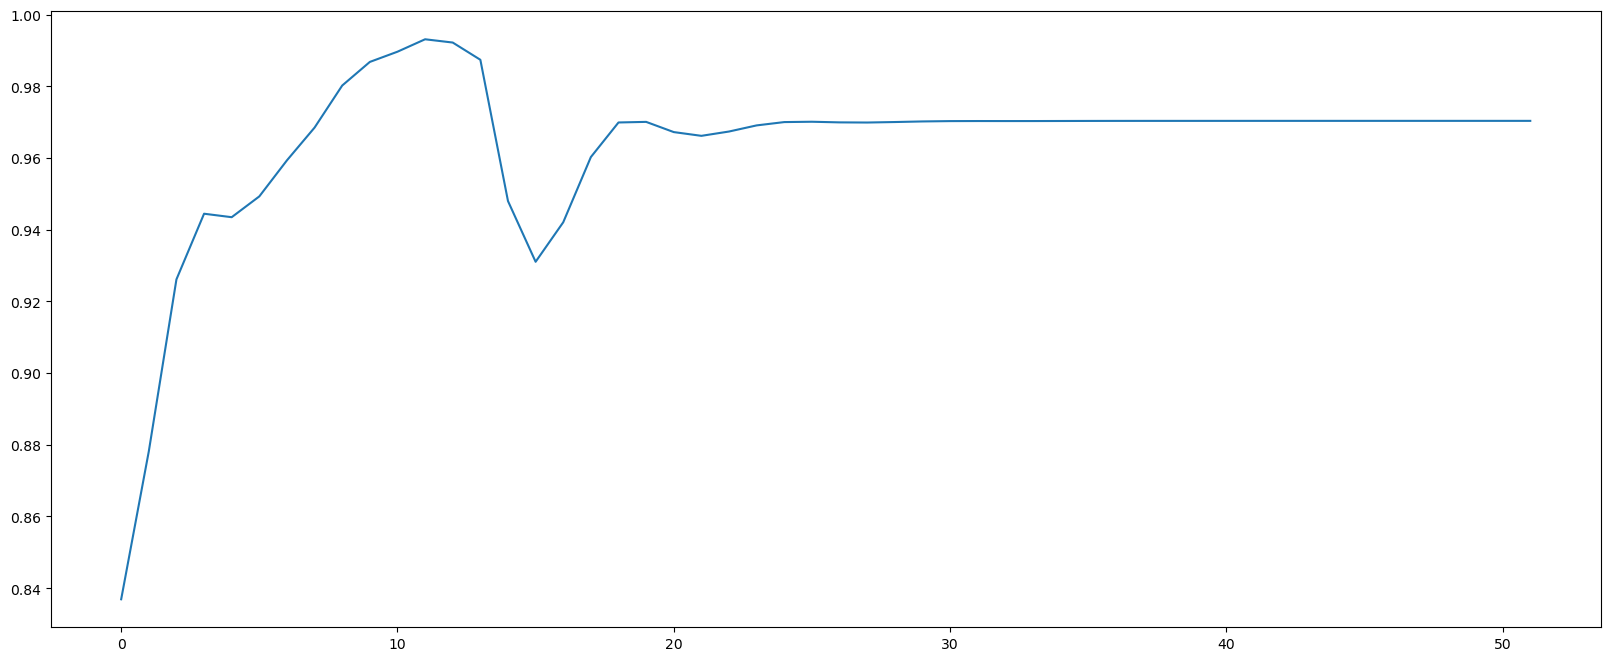

In [203]:
ts_LinearRegression = ts_greater_than_50.copy()

for ii, regressor in enumerate([LinearRegression]):
    #print(regressor_names[ii])
    regr = make_pipeline(StandardScaler(), regressor())
    regr.fit(X, y)
    
    for ii, num in enumerate(range(4*(2031-2022) + 1)):
        model_input = np.array([ts_LinearRegression[-n_input:]])
        #print('model input', model_input, model_input.shape)
        pred = regr.predict(model_input)
        #print('pred', pred)
        ts_LinearRegression.append(pred[0][0])
    plt.plot(ts_LinearRegression)

## LGBMRegressor

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


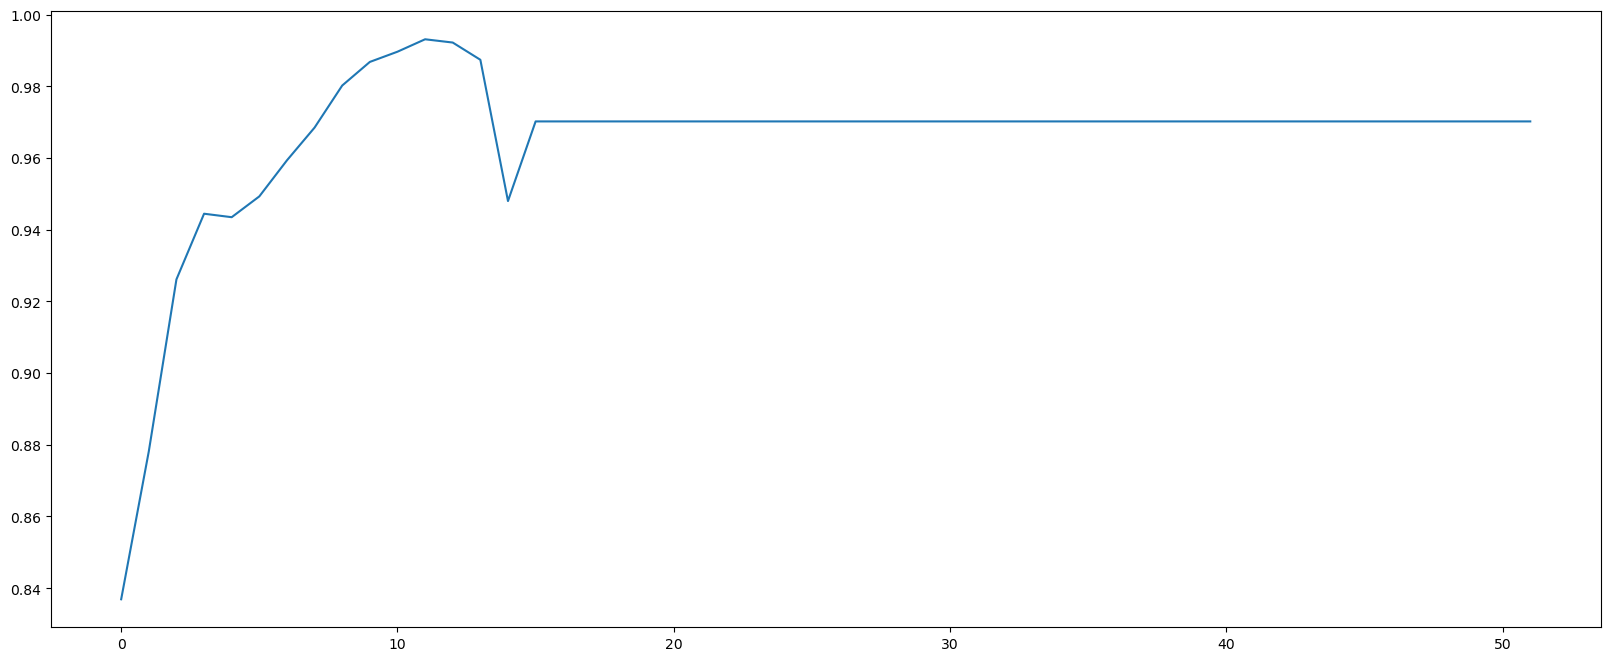

In [204]:
ts_LGBMRegressor = ts_greater_than_50.copy()

for ii, regressor in enumerate([LGBMRegressor]):
    #print(regressor_names[ii])
    regr = make_pipeline(StandardScaler(), regressor())
    regr.fit(X, y)
    
    for ii, num in enumerate(range(4*(2031-2022) + 1)):
        model_input = np.array([ts_LGBMRegressor[-n_input:]])
        #print('model input', model_input, model_input.shape)
        pred = regr.predict(model_input)
        #print('pred', pred)
        ts_LGBMRegressor.append(pred[0])
    plt.plot(ts_LGBMRegressor)

## XGBRegressor

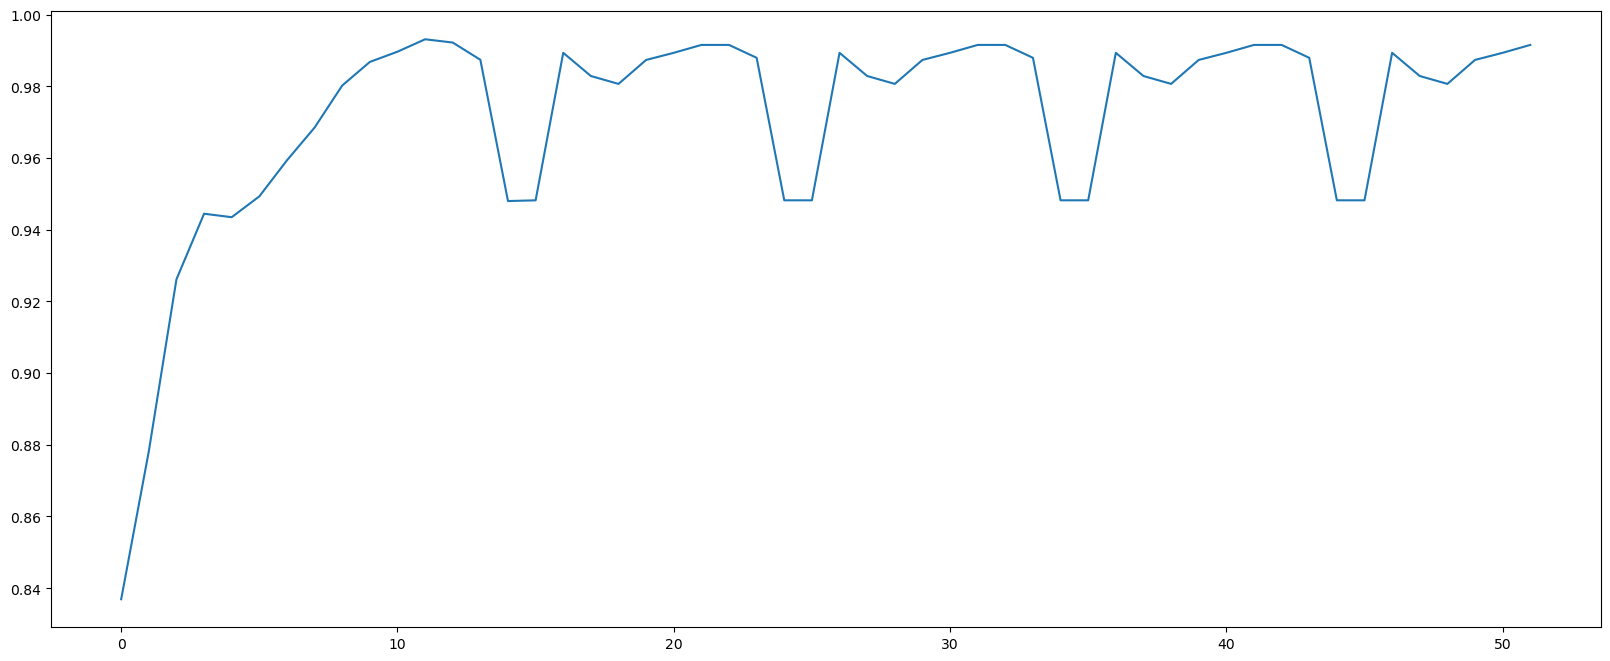

In [205]:
ts_XGBRegressor = ts_greater_than_50.copy()

for ii, regressor in enumerate([XGBRegressor]):
    #print(regressor_names[ii])
    regr = make_pipeline(StandardScaler(), regressor())
    regr.fit(X, y)
    
    for ii, num in enumerate(range(4*(2031-2022) + 1)):
        model_input = np.array([ts_XGBRegressor[-n_input:]])
        #print('model input', model_input, model_input.shape)
        pred = regr.predict(model_input)
        #print('pred', pred)
        ts_XGBRegressor.append(pred[0])
    plt.plot(ts_XGBRegressor)

In [ ]:
## 